In [1]:
%load_ext autoreload
%autoreload 2



In [2]:
# set random seed
import numpy as np
import random
np.random.seed(42)
random.seed(42)


## Data Generation

In [3]:
import numpy as np
import pandas as pd
from simulator import LungCancerProgressionGenerator

# Generate datasets for both scenarios
generator = LungCancerProgressionGenerator(num_patients=100000, doubling_time=134)
df_without_test = generator.generate_dataset(use_blood_test=False)
df_with_test = generator.generate_dataset(use_blood_test=True)

# Function to calculate and print statistics
def print_statistics(df, scenario):
    print(f"\nStatistics for {scenario}:")
    
    # Distribution of cancer stages at diagnosis
    stage_at_diagnosis = df[df['months_since_diagnosis'] == 0]['target_state'].value_counts(normalize=True).to_dict()
    print("\nDistribution of cancer stages at diagnosis:")
    for stage, count in stage_at_diagnosis.items():
        print(f"Stage {stage}: {count * 100:.2f}%")
    
    # Percentage of late-stage diagnoses (Stage III and IV)
    late_stage = (stage_at_diagnosis.get(3, 0) + stage_at_diagnosis.get(4, 0))
    print(f"\nPercentage of late-stage diagnoses (Stage III and IV): {late_stage * 100:.2f}%")
    
    # 1-year survival rate
    total_patients = df['sample_id'].nunique()
    patients_1year = df.groupby('sample_id').filter(lambda x: x['months_since_diagnosis'].max() > 12)
    survival_rate_1year = patients_1year['sample_id'].count() / total_patients
    # print(survival_rate_1year)
    print(f"\n1-year survival rate: {survival_rate_1year:.2f}")
    
    # Average age at diagnosis
    avg_age_at_diagnosis = df.groupby('sample_id')['age_at_diagnosis'].first().mean()
    print(f"\nAverage age at diagnosis: {avg_age_at_diagnosis:.2f} years")

    # # Average time spent in each state
    # state_durations = df.groupby('sample_id').apply(lambda x: x.groupby('origin_state')['time_transition_to_target'].diff().mean())
    # print("\nAverage time spent in each state (months):")
    # for state, duration in state_durations.mean().items():
    #     if state != 0 and not np.isnan(duration):  # Exclude Healthy state and NaN values
    #         print(f"State {state}: {duration:.2f}")

# Print statistics for both scenarios
print_statistics(df_without_test, "Without Blood Test")
print_statistics(df_with_test, "With Perfect Biennial Blood Test")

# Save the datasets to CSV files
df_without_test.to_csv('lung_cancer_data_15years_without_blood_test_accurate.csv', index=False)
df_with_test.to_csv('lung_cancer_data_15years_with_perfect_biennial_blood_test.csv', index=False)
print("\nData saved to 'lung_cancer_data_15years_without_blood_test_accurate.csv' and 'lung_cancer_data_15years_with_perfect_biennial_blood_test.csv'")


Statistics for Without Blood Test:

Distribution of cancer stages at diagnosis:
Stage 1: 53.81%
Stage 3: 18.02%
Stage 2: 15.24%
Stage 4: 12.94%

Percentage of late-stage diagnoses (Stage III and IV): 30.96%

1-year survival rate: 42.51

Average age at diagnosis: 69.38 years

Statistics for With Perfect Biennial Blood Test:

Distribution of cancer stages at diagnosis:
Stage 1: 85.44%
Stage 2: 14.56%

Percentage of late-stage diagnoses (Stage III and IV): 0.00%

1-year survival rate: 63.73

Average age at diagnosis: 69.40 years

Data saved to 'lung_cancer_data_15years_without_blood_test_accurate.csv' and 'lung_cancer_data_15years_with_perfect_biennial_blood_test.csv'


In [4]:
print(generator.get_monthly_death_probability(1))
print(generator.get_monthly_death_probability(2))
print(generator.get_monthly_death_probability(3))
print(generator.get_monthly_death_probability(4))

0.007154002685681893
0.01515549399745375
0.03112402340674325
0.04870291331009746


In [21]:
# check numbers of deceased patients in df_with_test and df_without_test
print(df_with_test[df_with_test['target_state'] == 5]['sample_id'].nunique())
print(df_without_test[df_without_test['target_state'] == 5]['sample_id'].nunique())

1751
1809


In [6]:
df_without_test.head()

,sample_id,origin_state,target_state,months_since_diagnosis,months_since_onset,age_at_diagnosis,time_entry_to_origin,time_transition_to_target
0,16,0,1,-1,0,NaN,6,7
1,16,1,1,-1,1,NaN,7,8
2,16,1,1,-1,2,NaN,8,9
3,16,1,1,-1,3,NaN,9,10
4,16,1,1,-1,4,NaN,10,11


In [7]:
df_with_test.head()

,sample_id,origin_state,target_state,months_since_diagnosis,months_since_onset,age_at_diagnosis,time_entry_to_origin,time_transition_to_target
0,2,0,1,-1,0,NaN,114,115
1,2,1,1,-1,1,NaN,115,116
2,2,1,1,-1,2,NaN,116,117
3,2,1,1,-1,3,NaN,117,118
4,2,1,1,-1,4,NaN,118,119


## Data Exploration and Visualisation

Time: 0.0
State counts: target_state
1    890
3    298
2    252
4    214
Name: count, dtype: int64
Time: 1.0
State counts: target_state
1    851
3    263
2    261
4    240
5     29
6     10
Name: count, dtype: int64
Time: 2.0
State counts: target_state
1    805
2    262
4    256
3    244
5     65
6     22
Name: count, dtype: int64
Time: 3.0
State counts: target_state
1    764
4    285
2    260
3    218
5     91
6     36
Name: count, dtype: int64
Time: 4.0
State counts: target_state
1    717
4    323
2    258
3    196
5    111
6     49
Name: count, dtype: int64
Time: 5.0
State counts: target_state
1    666
4    354
2    252
3    173
5    145
6     64
Name: count, dtype: int64
Time: 6.0
State counts: target_state
1    619
4    367
2    250
5    179
3    165
6     74
Name: count, dtype: int64
Time: 7.0
State counts: target_state
1    565
4    378
2    260
5    219
3    154
6     78
Name: count, dtype: int64
Time: 8.0
State counts: target_state
1    516
4    371
2    261
5    251
3    172


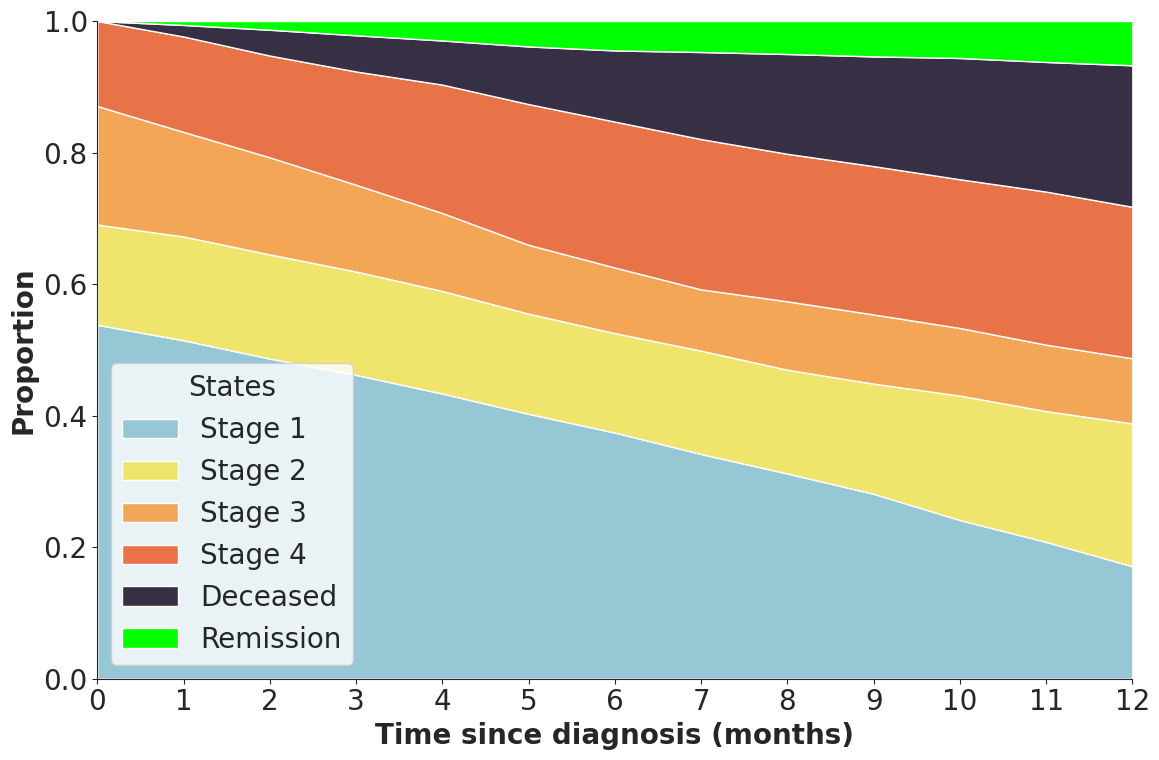

Time: 0.0
State counts: target_state
1    2060
2     351
Name: count, dtype: int64
Time: 1.0
State counts: target_state
1    1971
2     399
5      22
6      19
Name: count, dtype: int64
Time: 2.0
State counts: target_state
1    1876
2     450
6      41
5      38
3       6
Name: count, dtype: int64
Time: 3.0
State counts: target_state
1    1782
2     487
6      63
5      47
3      32
Name: count, dtype: int64
Time: 4.0
State counts: target_state
1    1671
2     511
5      77
6      77
3      75
Name: count, dtype: int64
Time: 5.0
State counts: target_state
1    1443
2     443
3     101
5      92
6      92
Name: count, dtype: int64
Time: 6.0
State counts: target_state
1    1356
2     465
3     130
5     113
6     107
Name: count, dtype: int64
Time: 7.0
State counts: target_state
1    1247
2     497
3     166
5     131
6     130
Name: count, dtype: int64
Time: 8.0
State counts: target_state
1    1138
2     544
3     199
5     147
6     143
Name: count, dtype: int64
Time: 9.0
State counts:

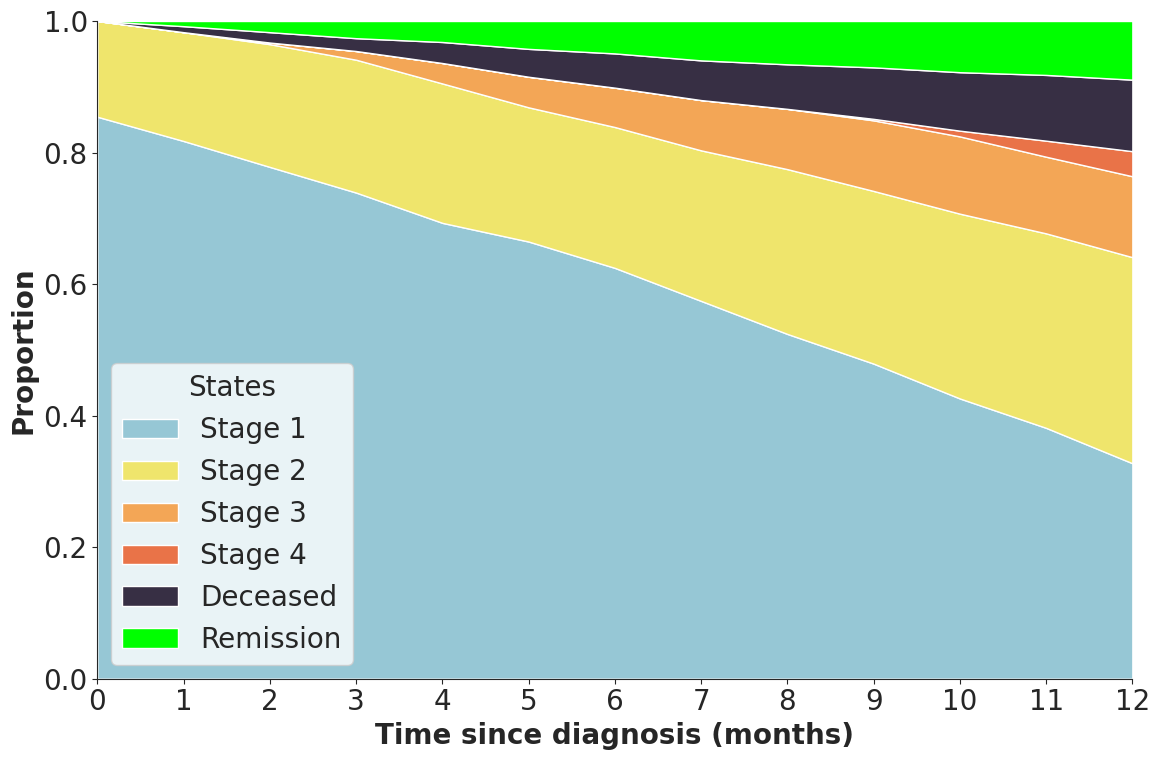

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from data_prep import align_to_diagnosis
import seaborn as sns
sns.set_style('ticks')

def create_stacked_area_chart(df, title, save_path=None):
    # Align data to diagnosis point
    aligned_df = align_to_diagnosis(df)
    
    # Ensure all columns are numeric
    for col in aligned_df.columns:
        if aligned_df[col].dtype == 'object':
            aligned_df[col] = pd.to_numeric(aligned_df[col], errors='coerce')
    
    # Remove any rows with NaN values
    aligned_df = aligned_df.dropna()
    
    # Process the aligned data
    time_points = sorted(aligned_df['adjusted_time'].unique())
    states = sorted(aligned_df['target_state'].unique())
    
    initial_states_count = len(aligned_df[aligned_df['adjusted_time'] == 0]['target_state'])
    # Create a DataFrame to hold the proportions
    proportions = pd.DataFrame(index=time_points, columns=states)
    
    prev_censored = 0
    
    # Calculate proportions for each state at each time point
    for time in time_points:
        time_slice = aligned_df[aligned_df['adjusted_time'] == time]
        state_counts = time_slice['target_state'].value_counts()
        total = len(time_slice['sample_id'].unique())
        # for the difference between current total and initial total, fill with state 5 (death)
        
        # for debugging
        if time < 25:
            print('Time:', time)
            print('State counts:', state_counts)
        
        for state in states:
            proportions.loc[time, state] = state_counts.get(state, 0) / total
            
    proportions.to_csv('proportions_temp.csv')
    
    proportions = pd.read_csv('proportions_temp.csv', header=None, index_col=0)
    
    # Create the stacked area plot
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # increase font size
    plt.rcParams.update({'font.size': 20})
    # make it bold 
    plt.rcParams['axes.labelweight'] = 'bold'

    colors = []#.reshape(5,3)
    #use hex color
    colors.append((150, 199, 213))
    colors.append((239, 229, 108))
    colors.append((243, 166, 86))
    colors.append((233, 115, 72))
    colors.append((55, 47, 68))
    # light green for remission
    colors.append((0, 255, 0))
    
    colors = np.array(colors) / 255
    
    # delete first row in proportions
    proportions = proportions.iloc[1:]
    
    month = 12
    month = month + 1
    # cut off at 5 years
    proportions = proportions.iloc[:month]
    
    # rename states
    states = ['Stage 1', 'Stage 2', 'Stage 3', 'Stage 4', 'Deceased', 'Remission']
    
    ax.stackplot(proportions.index, proportions.T, labels=states, colors=colors)
    
    # Customize the plot
    ax.set_xlabel('Time since diagnosis (months)')
    ax.set_ylabel('Proportion')
    # ax.set_title(title)
    # ax.legend(title='States', bbox_to_anchor=(1.05, 1), loc='upper left')
    # put legend inside the plot on the bottom left
    ax.legend(title='States', loc='lower left')
    ax.set_xlim(0, month - 1)
    ax.set_ylim(0, 1)
    
    # set x ticks
    ax.set_xticks(np.arange(0, month, 1))
    # set x tick labels
    ax.set_xticklabels(np.arange(0, month, 1))
    # Add gridlines
    ax.grid(True, alpha=0.3)
    
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=600)
    plt.show()
    return proportions, aligned_df

# Assuming df_without_test and df_with_test are your DataFrames
proportions_without, aligned_without = create_stacked_area_chart(df_without_test, "Cancer Progression Without Blood Test", save_path='figures/cancerProgressionWithoutBloodtest.pdf')
proportions_with, aligned_with = create_stacked_area_chart(df_with_test, "Cancer Progression With Blood Test", save_path='figures/cancerProgressionWithBloodtest.pdf')

In [22]:
# check number of patients at diagnosis
print(aligned_without[aligned_without['adjusted_time'] == 0]['sample_id'].nunique())
print(aligned_with[aligned_with['adjusted_time'] == 0]['sample_id'].nunique())

1654
2411


In [9]:
# check stage proportions at diagnosis
print(aligned_without[aligned_without['adjusted_time'] == 0]['target_state'].value_counts(normalize=True))
print(aligned_with[aligned_with['adjusted_time'] == 0]['target_state'].value_counts(normalize=True))

target_state
1    0.538089
3    0.180169
2    0.152358
4    0.129383
Name: proportion, dtype: float64
target_state
1    0.854417
2    0.145583
Name: proportion, dtype: float64


## Overall Survival Analysis

In [10]:
# plot 2 year Overall survival with and without blood test using lifelines with number at risk and confidence interval
# using aligned_with and aligned_without

from lifelines import KaplanMeierFitter
from lifelines.plotting import add_at_risk_counts
from lifelines.utils import median_survival_times
from lifelines.statistics import logrank_test
import matplotlib.pyplot as plt

def plot_survival_curves(aligned_df_with, aligned_df_without):
    # filter for only deceased patients
    # aligned_df_with = aligned_df_with[aligned_df_with['target_state'] == 5]
    # aligned_df_without = aligned_df_without[aligned_df_without['target_state'] == 5]
    
    month = 12
    
    # filter for only 1 years and more than -1
    aligned_df_with = aligned_df_with[aligned_df_with['months_since_diagnosis'] <= month] 
    aligned_df_without = aligned_df_without[aligned_df_without['months_since_diagnosis'] <= month]
    
    # keep one row per patient, with the last state
    aligned_df_with = aligned_df_with.sort_values('months_since_diagnosis').groupby('sample_id').tail(1)
    aligned_df_without = aligned_df_without.sort_values('months_since_diagnosis').groupby('sample_id').tail(1)
    
    
    # Create a KaplanMeierFitter object
    kmf_with = KaplanMeierFitter()
    kmf_without = KaplanMeierFitter()

    # Fit the data to the model
    kmf_with.fit(durations=aligned_df_with['months_since_diagnosis'], event_observed=aligned_df_with['target_state'] == 5, label='With Blood Test')
    kmf_without.fit(durations=aligned_df_without['months_since_diagnosis'], event_observed=aligned_df_without['target_state'] == 5, label='Without Blood Test')
    
    # Add 2 year OS rate with confidence interval in legend
    two_year_os_with = kmf_with.survival_function_at_times([month]).values[0]
    two_year_os_without = kmf_without.survival_function_at_times([month]).values[0]
    
    # get confidence interval
    # print(kmf_without.survival_function_at_times([12]))
    print(kmf_with.confidence_interval_survival_function_.iloc[month]['With Blood Test_lower_0.95'])
    print(kmf_with.confidence_interval_survival_function_.iloc[month]['With Blood Test_upper_0.95'])
    with_upper = kmf_with.confidence_interval_survival_function_.iloc[month]['With Blood Test_upper_0.95']
    with_lower = kmf_with.confidence_interval_survival_function_.iloc[month]['With Blood Test_lower_0.95']
    # print(kmf_without.survival_function_at_times([12]))
    print(kmf_without.confidence_interval_survival_function_.iloc[month]['Without Blood Test_lower_0.95'])
    print(kmf_without.confidence_interval_survival_function_.iloc[month]['Without Blood Test_upper_0.95'])
    without_upper = kmf_without.confidence_interval_survival_function_.iloc[month]['Without Blood Test_upper_0.95']
    without_lower = kmf_without.confidence_interval_survival_function_.iloc[month]['Without Blood Test_lower_0.95']
    # ci_with = kmf_with.confidence_interval_survival_function_at_times([12])
    # ci_without = kmf_without.confidence_interval_survival_function_at_times([12])
    

    # Create a plot
    fig, ax = plt.subplots(figsize=(14, 10))
    kmf_with.plot(ax=ax, label='With Blood Test (1-year OS: {:.2f} [{:.2f} - {:.2f}])'.format(two_year_os_with, with_lower, with_upper))
    kmf_without.plot(ax=ax, label='Without Blood Test (1-year OS: {:.2f} [{:.2f} - {:.2f}])'.format(two_year_os_without, without_lower, without_upper))
    add_at_risk_counts(kmf_with, kmf_without, ax=ax)
    # ax.set_title('Overall Survival with and without Blood Test')
    ax.set_xlabel('Months since diagnosis')
    ax.set_ylabel('Survival probability')
    
    
    # Perform log-rank test
    results = logrank_test(aligned_df_with['months_since_diagnosis'], aligned_df_without['months_since_diagnosis'], event_observed_A=aligned_df_with['target_state'] == 5, event_observed_B=aligned_df_without['target_state'] == 5)
    print(f"\nLog-rank test p-value: {results.p_value}")
    
    
    print(f"\n1-year OS with blood test: {two_year_os_with:.2f}")
    print(f"1-year OS without blood test: {two_year_os_without:.2f}")


    ax.plot([], [], ' ', label=f'p-value: {results.p_value if results.p_value > 0.0001 else "< 0.0001"}')
    
    ax.legend()
    
    plt.tight_layout()
    
    plt.savefig('figures/overallSurvivalWithAndWithoutBloodTest.pdf', dpi=600)
    
    # ax.legend(title='Blood Test')
    
    plt.show()

    
    
    
    
    

0.8753482680913485
0.9021803780355938
0.7543356307254088
0.795644975246757

Log-rank test p-value: 3.1364432405469232e-21

1-year OS with blood test: 0.89
1-year OS without blood test: 0.78


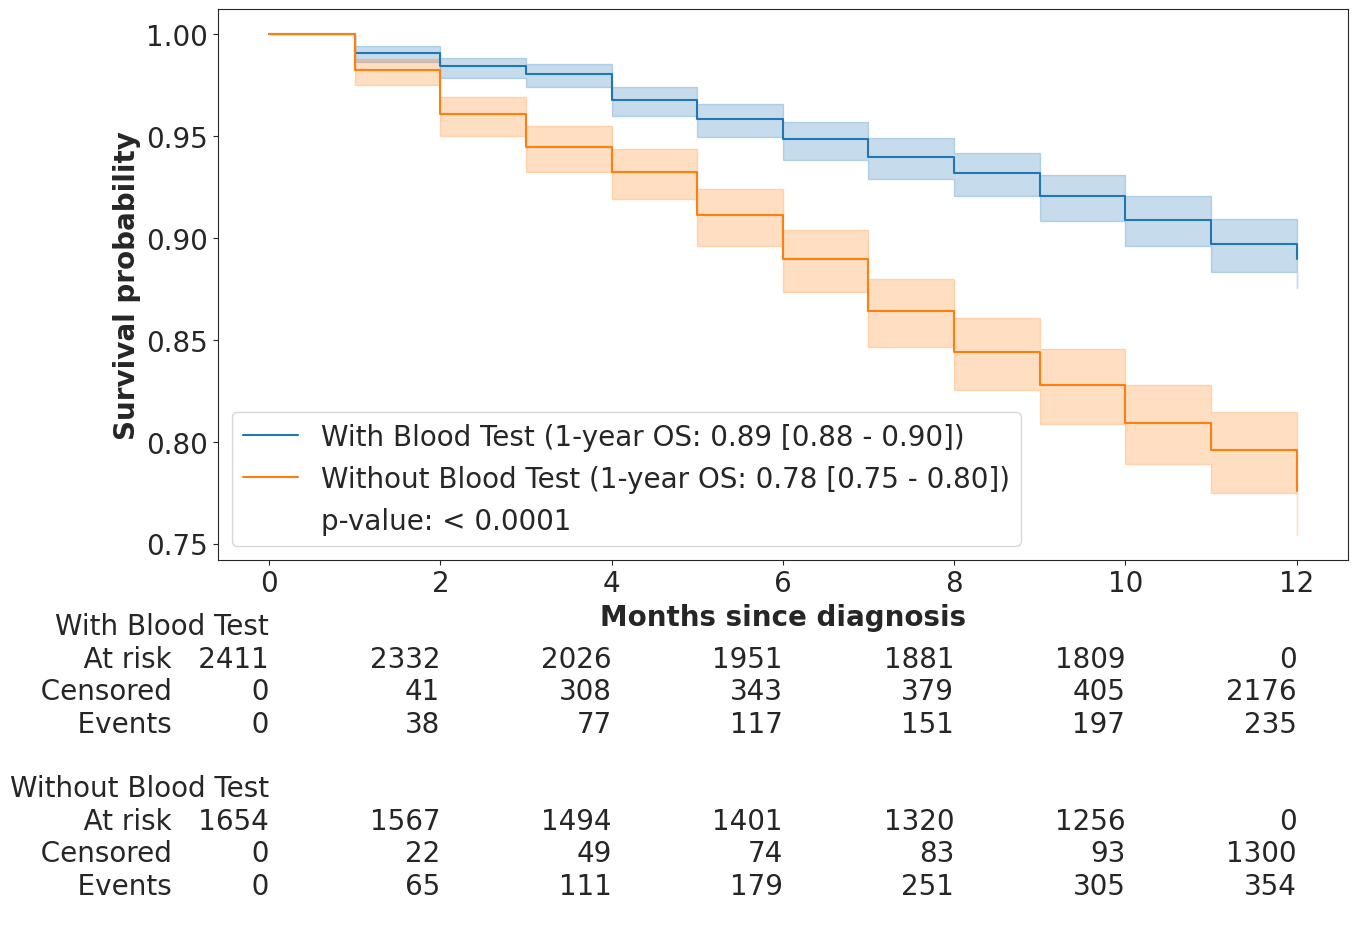

In [11]:
plot_survival_curves(aligned_with, aligned_without)

## Stage Distribution at Diagnosis

In [32]:
# Plot distribution of cancer stages at diagnosis
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('ticks')

def plot_stage_distribution(aligned_df_with, aligned_df_without):
    aligned_df_with_diagnosis = aligned_df_with[aligned_df_with['adjusted_time'] == 0]
    aligned_df_without_diagnosis = aligned_df_without[aligned_df_without['adjusted_time'] == 0]
    
    # Create a figure
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # increase font size
    plt.rcParams.update({'font.size': 20})
    # make it bold 
    plt.rcParams['axes.labelweight'] = 'bold'
    
    state_counts_with = aligned_df_with_diagnosis['target_state'].value_counts(normalize=True)
    state_counts_without = aligned_df_without_diagnosis['target_state'].value_counts(normalize=True)
    # sort by index
    state_counts_with = state_counts_with.sort_index()
    state_counts_without = state_counts_without.sort_index()
    
    df_with = pd.DataFrame(state_counts_with)
    df_with['Blood Test'] = 'With Blood Test'
    df_without = pd.DataFrame(state_counts_without)
    df_without['Blood Test'] = 'Without Blood Test'
    
    combined_df = pd.concat([df_with, df_without]).reset_index()
    
    print(combined_df)
    
    # Plot the distribution of cancer stages at diagnosis
    ax = sns.barplot(data=combined_df, x='target_state', y='proportion', hue='Blood Test', ax=ax)
    
    # plot bar labels
    
    ax.bar_label(ax.containers[0], labels=[f"{val * 100:.1f}%" for val in state_counts_with.values], label_type='edge', fontsize=20, fontweight='bold')
    ax.bar_label(ax.containers[1], labels=[f"{val * 100:.1f}%" for val in state_counts_without.values], label_type='edge', fontsize=20, fontweight='bold')
        
    # Customize the plot
    ax.set_xlabel('Cancer Stage at Diagnosis')
    ax.set_ylabel('Number of Patients')
    # ax.set_title('Distribution of Cancer Stages at Diagnosis')
    ax.legend(title='Blood Test')
    
    plt.tight_layout()
    plt.savefig('figures/stageDistributionAtDiagnosis.pdf', dpi=600)
    plt.show()


   target_state  proportion          Blood Test
0             1    0.854417     With Blood Test
1             2    0.145583     With Blood Test
2             1    0.538089  Without Blood Test
3             2    0.152358  Without Blood Test
4             3    0.180169  Without Blood Test
5             4    0.129383  Without Blood Test


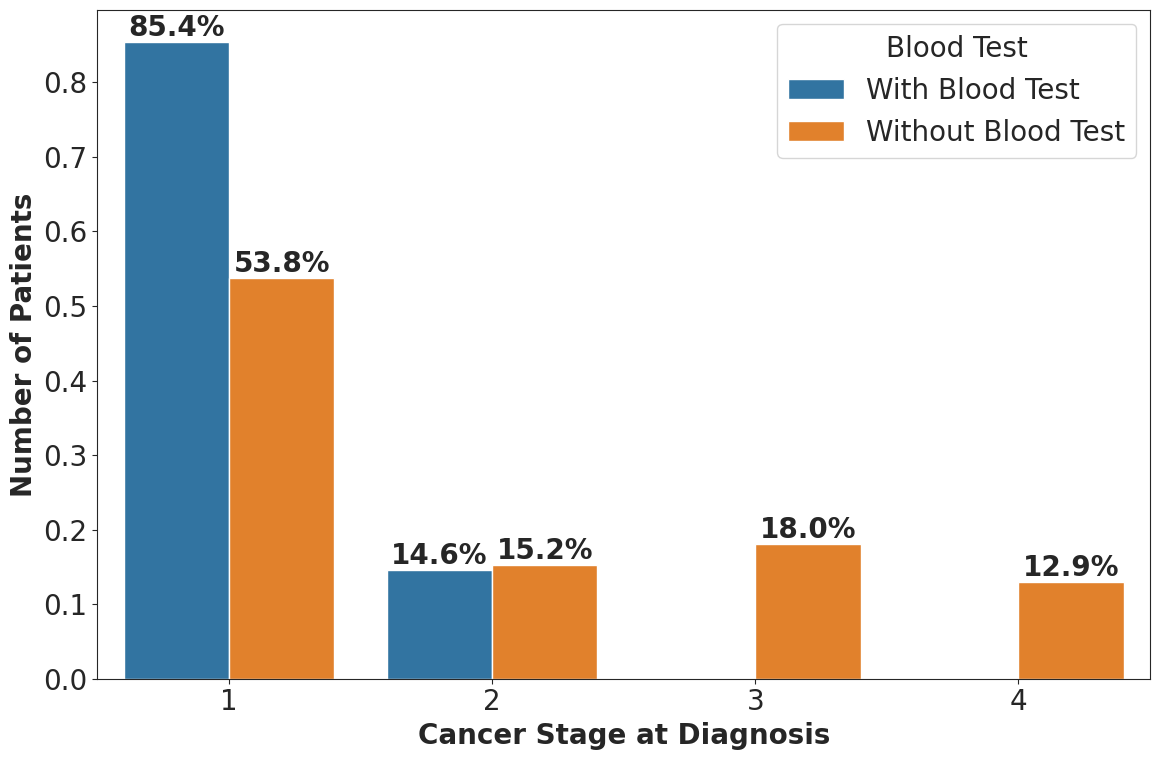

In [33]:
plot_stage_distribution(aligned_with, aligned_without)